In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from scipy import stats
import pandas as pd

from scipy import fftpack

from scipy.interpolate import interp1d

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

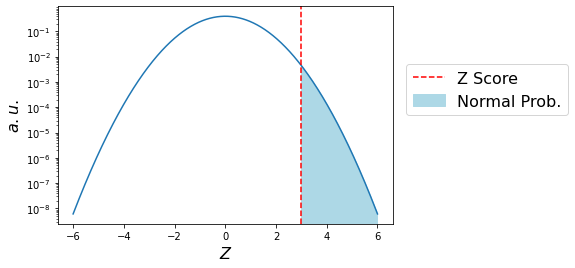

Assuming statistically significative ---> alpha = 0.0013


In [2]:
xs= np.linspace(-6,6,1000)

ts=stats.norm.pdf(xs)
Z=3


plt.plot(xs , ts , label='_nolegend_')

plt.fill_between(xs, ts, where= xs > np.abs(Z), color='lightblue' , label='Normal Prob.')

plt.axvline(Z, linestyle='--', color='red' , label='Z Score' )
plt.ylabel("$a.u.$" , fontsize=16)
plt.xlabel("$Z$", fontsize=16)
plt.yscale("log")
plt.legend(loc=(1.04 , 0.5) , fontsize=16)
plt.show()


p_val=(stats.norm.sf(Z))
print("Assuming statistically significative ---> alpha = %5.4f"%(p_val))

Probability that in a year 15 (included) hurricanes happen is 0.00222


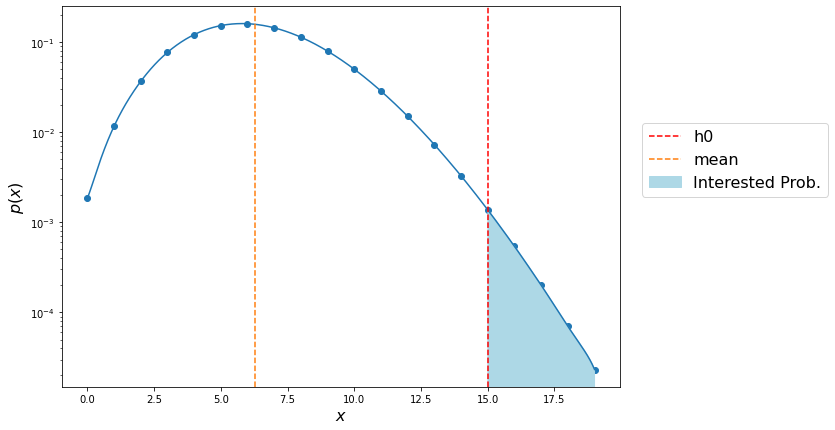

In [3]:
def poisson(l, k):
    return l**k * np.exp(-l) / np.math.factorial(k)

h0=15
h_mu=6.3

pdf=stats.poisson.sf(k=h0-1, mu=h_mu)  #h0 is not included, have to start before it
print("Probability that in a year %i (included) hurricanes happen is %2.5f"%(h0,pdf))

#another method
#prob_less_x0 = np.sum([poisson(mu, i) for i in range(x0)])
#prob = 1- prob_less_x0


# determine the Z score
#Z = abs(h0 - h_mu) / np.sqrt(h_mu)
#print("Z score is =", Z)


# plot the measurement and its assumed pdf
plt.figure(figsize=(10,7))

w = np.abs(h_mu - h0)
x = range(20)
y = [poisson(h_mu, xi) for xi in x]


plt.scatter(x, y , label='_nolegend_')

f = interp1d(x, y, kind='cubic')
rang_x = np.linspace(0, 19, 1000)


plt.plot(rang_x ,f(rang_x) , label='_nolegend_')

plt.fill_between(rang_x, f(rang_x), where=np.abs(rang_x - h_mu) > w, color='lightblue' , label='Interested Prob.')

plt.axvline(h0, linestyle='--', color='red' , label='h0' )
plt.axvline(h_mu, linestyle='--', color='C1' ,  label='mean')
plt.ylabel("$p(x)$" , fontsize=16)
plt.xlabel("$x$", fontsize=16)
plt.yscale("log")
plt.legend(loc=(1.04 , 0.5) , fontsize=16)
plt.show()

$ P_{\geq 15} = 0.00222 > \alpha = 0.0013 $

Observing 15 hurricanes in 2005 was signficantly different from average

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T student test --->  -3.991846326292112


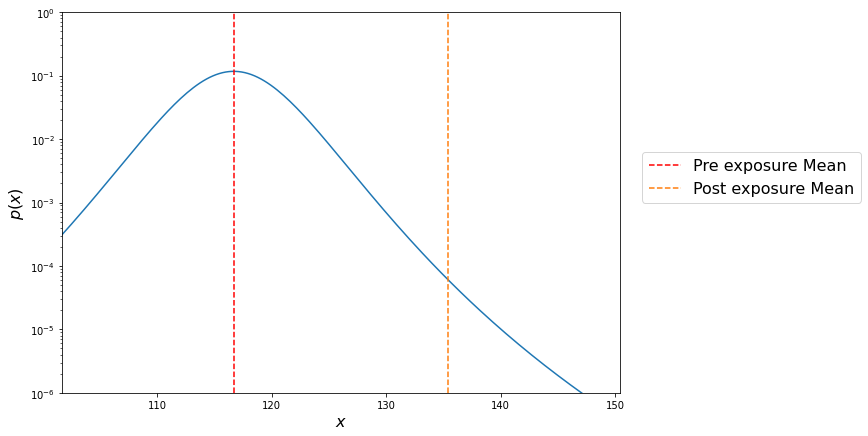

In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma=np.sqrt((pre.std()**2 + post.std()**2)/2)
n=len(post)

T_stud=((pre.mean() - post.mean())/(sigma * np.sqrt(2/n)))
print("T student test ---> " , T_stud)

# plot the 
mu_pre=pre.mean()
mu_post=post.mean()
x = np.linspace(mu_pre - mu_post - 5, mu_post + mu_pre + 5, 1000)
y = stats.t.pdf(x, loc=mu_pre, scale=sigma / np.sqrt(n), df=n - 1)

plt.figure(figsize=(10,7))

plt.plot(x, y)
plt.axvline(mu_pre, linestyle='--', color='red' , label = "Pre exposure Mean")
plt.axvline(mu_post, linestyle='--', color='C1' , label = "Post exposure Mean")

#plt.xticks([mu_pre - mu_post, mu_pre + mu_post], [mu_pre - mu_post, mu_pre + mu_post])
plt.ylabel("$p(x)$" , fontsize=16)
plt.xlabel("$x$" , fontsize=16)
plt.yscale("log")

plt.xlim([mu_pre-15, mu_post+15])
plt.ylim([1e-6, 1])

plt.legend(loc=(1.04,0.5) , fontsize=16)
plt.show()


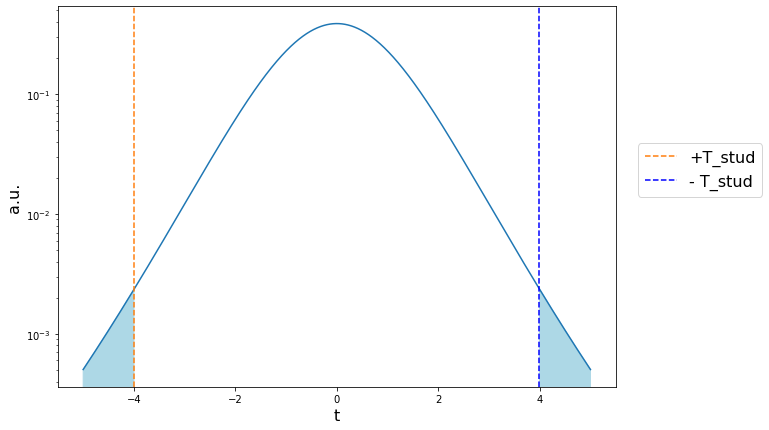

p-value = 0.0031489409354536393


In [5]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)

plt.figure(figsize=(10,7))
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T_stud), color='lightblue')

plt.axvline(T_stud, linestyle='--', color='C1' , label='+T_stud')
plt.axvline(-T_stud, linestyle='--', color='blue' ,  label='- T_stud')

plt.ylabel("a.u." , fontsize=16)
plt.xlabel("t" , fontsize=16)
plt.yscale("log")

plt.legend(loc=(1.04,0.5) , fontsize=16)
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T_stud, n - 1) + (1. - stats.t.cdf(-T_stud, n - 1))
print("p-value =", pvalue)

$ P_{value} = 0.0031 < \alpha $

Since the p-value is $< \alpha$, the null hypothesis is rejected.

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Peak frequency of Hares : 0.09524 
Peak frequency of Lynxes population: 0.09524

 Same peak frequency, corresponding populations: 
  715700.0  Hares 
  423500.0  Lynxes 

 The period is :  10.5  years


[]

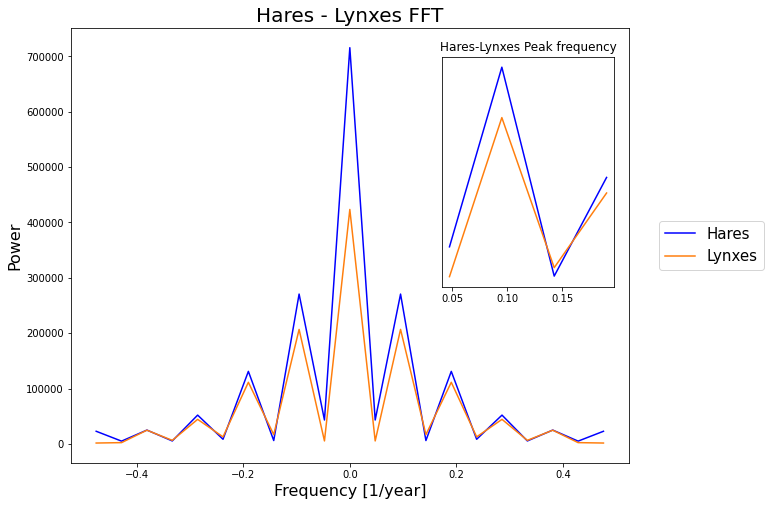

In [6]:
file_name='/home/ilazza/LaboratoryOfComputationalPhysics_Y4/dataEs9/populations.txt'


dataset=np.loadtxt(file_name)

years = dataset[:,0]
hares = dataset[:,1]
lynxes = dataset[:,2]

har_fft = fftpack.fft(hares)
lyn_fft = fftpack.fft(lynxes)


har_power = np.abs(har_fft)
lyn_power = np.abs(lyn_fft)
sample_freq = fftpack.fftfreq(len(years), d=1)

ind = np.argsort(sample_freq)

# Plot the FFT power
plt.figure(figsize=(10, 8))

plt.plot(sample_freq[ind], har_power[ind] , c='b' , label='Hares')
plt.plot(sample_freq[ind], lyn_power[ind] , c='C1' , label='Lynxes')
plt.title("Hares - Lynxes FFT", fontsize=20)
plt.xlabel("Frequency [1/year]", fontsize=16)
plt.ylabel("Power", fontsize=16)

plt.legend(loc='center left' , bbox_to_anchor=(1.04,0.5) , fontsize=15)




# Find the peak frequency: focus only on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]

powes_har=har_power[pos_mask]
powes_lyn=lyn_power[pos_mask]


# find the max of freqs array
peak_freq_har = freqs[powes_har.argmax()]  #equal to powes_lyn.argmax()
peak_freq_lyn = freqs[powes_lyn.argmax()]  


print("Peak frequency of Hares : %2.5f" %(peak_freq_har) ,"\nPeak frequency of Lynxes population: %2.5f"%(peak_freq_lyn))
print("\n Same peak frequency, corresponding populations: \n " , np.max(har_power) , " Hares \n ", np.max(lyn_power) , " Lynxes ")

print("\n The period is : ", 1./peak_freq_har , " years")


# inner plots to show the peak frequency
axes = plt.axes([0.64, 0.43, 0.24, 0.4])

plt.title('Hares-Lynxes Peak frequency')
plt.plot(freqs[:4], powes_har[:4] , c='b' )
plt.plot(freqs[:4], powes_lyn[:4] , c='C1')
plt.setp(axes, yticks=[])





4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

(-0.5, 629.5, 473.5, -0.5)

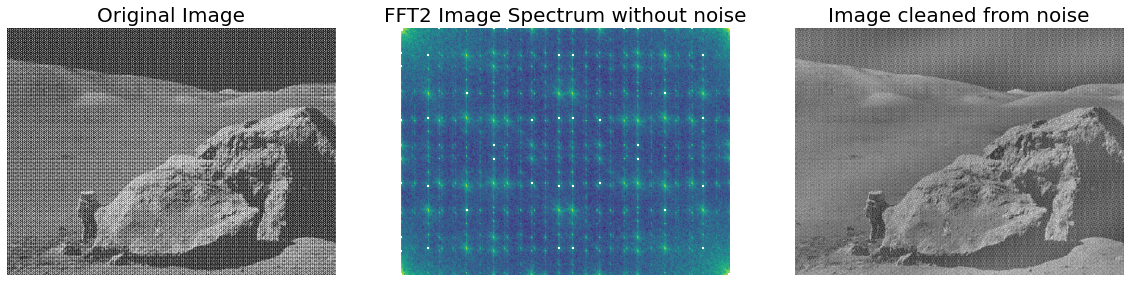

In [20]:
#Examine the provided image moonlanding.png, which is heavily contaminated with periodic noise. 
#In this exercise, we aim to clean up the noise using the Fast Fourier Transform.

#Load the image using pylab.imread()

file_name = '/home/ilazza/LaboratoryOfComputationalPhysics_Y4/dataEs9/moonlanding.png'

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,15))

image = plt.imread(file_name)

ax[0].set_title("Original Image", fontsize=20)
ax[0].imshow(image , cmap = 'gray')
ax[0].axis('off')

#Find and use the 2-D FFT function in scipy.fftpack, 
#and plot the spectrum (Fourier transform of) the image.

#Do you have any trouble visualising the spectrum? 
#If so, why? The spectrum consists of high and low frequency components.
#The noise is contained in the high-frequency part of the spectrum,
#so set some of those components to zero (use array slicing). 


img_fft = fftpack.fft2(image)

img_fft[np.abs(img_fft) > 3000] = 0

ax[1].set_title("FFT2 Image Spectrum without noise", fontsize=20)
ax[1].imshow(abs(img_fft) , norm= LogNorm(vmin=5))
ax[1].axis('off')


#Apply the inverse Fourier transform to see the resulting image.

ax[2].set_title("Image cleaned from noise", fontsize=20)
ax[2].imshow(fftpack.ifft2(img_fft).real , cmap='gray')
ax[2].axis('off')



(-0.5, 629.5, 473.5, -0.5)

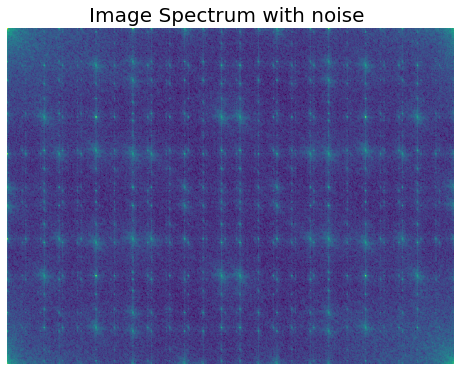

In [8]:
img_fft_with_noise = fftpack.fft2(image)

plt.figure(figsize=(8,7))
plt.title("Image Spectrum with noise ", fontsize=20)
plt.imshow(abs(img_fft_with_noise) , norm= LogNorm(vmin=5))
plt.axis('off')


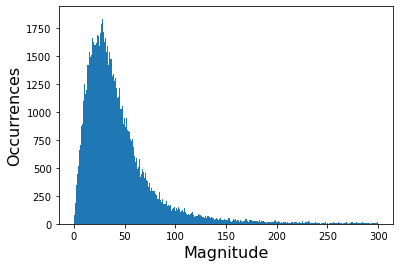

In [10]:
magnitudes = np.reshape(np.abs(img_fft), (np.prod(img_fft.shape)))

plt.hist(magnitudes, bins=1000, range=[0,300])
plt.xlabel("Magnitude" , fontsize=16)
plt.ylabel("Occurrences" , fontsize=16)
plt.show()

Do you have any trouble visualising the spectrum? 

There are troubles due to the noise present in the image